<a href="https://colab.research.google.com/github/RitaDCassia/CNN/blob/main/niveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split # dividir dados em treino e teste
from sklearn.naive_bayes import GaussianNB # neive bayes
from sklearn.preprocessing import LabelEncoder # fazer o enconding
from sklearn.metrics import confusion_matrix, accuracy_score # criar a matriz de confusão
from yellowbrick.classifier import ConfusionMatrix # criar a matriz de confusão de forma grafica

In [55]:
credito = pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [56]:
credito.head() #vizualizar

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [57]:
previsores = credito.iloc[:, 0:20].values # divide os pevisores da classe
# previsores de 0 a 20
classe = credito.iloc[:, 20].values #e a classe na posicao 20 em outro registro

In [58]:
# transformação dos atributos categóricos
# precisamos criar um objeto para cada
labelencoder1 = LabelEncoder()
# pego os previsores na posição 0 e transformo eles
previsores[:, 0] = labelencoder1.fit_transform(previsores[:, 0])

labelencoder2 = LabelEncoder()
previsores[:, 2] = labelencoder2.fit_transform(previsores[:, 2])

labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])

labelencoder5 = LabelEncoder()
previsores[:, 5] = labelencoder5.fit_transform(previsores[:, 5])

labelencoder6 = LabelEncoder()
previsores[:, 6] = labelencoder6.fit_transform(previsores[:, 6])

labelencoder8 = LabelEncoder()
previsores[:, 8] = labelencoder8.fit_transform(previsores[:, 8])

labelencoder9 = LabelEncoder()
previsores[:, 9] = labelencoder9.fit_transform(previsores[:, 9])

labelencoder11 = LabelEncoder()
previsores[:, 11] = labelencoder11.fit_transform(previsores[:, 11])

labelencoder13 = LabelEncoder()
previsores[:, 13] = labelencoder13.fit_transform(previsores[:, 13])

labelencoder14 = LabelEncoder()
previsores[:, 14] = labelencoder14.fit_transform(previsores[:, 14])

labelencoder16 = LabelEncoder()
previsores[:, 16] = labelencoder16.fit_transform(previsores[:, 16])

labelencoder18 = LabelEncoder()
previsores[:, 18] = labelencoder18.fit_transform(previsores[:, 18])

labelencoder19 = LabelEncoder()
previsores[:, 19] = labelencoder19.fit_transform(previsores[:, 19])

In [59]:
# divisão dos dados entre treino e teste
# retornamos 4 objetos que vamos armazenar
# train_test_split: com previsores a classe, o tamanho do teste: 30
# o restante será usado para treino
# x variavel idependente, y variavel dependente
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

x_teste

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

In [60]:
# criação e treinamento do modelo (gração da tabela de probabilidades)
# aqui quando criamos o modelo vamos usar os dados de treinamento e nao de teste
# variavel idependente e dependente
# com a chamada de fit ela gera o modelo
naive_bayes = GaussianNB()
naive_bayes.fit(x_treinamento, y_treinamento)

GaussianNB()

In [61]:
# previsões utilizando registros de teste
previsoes = naive_bayes.predict(x_teste) # ele preve
previsoes

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [62]:
# geracao da mariz de confusao e calculo de taca de acerto e erro
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 41,  45],
       [ 42, 172]])

In [63]:
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.71

In [64]:
taxa_erro

0.29000000000000004

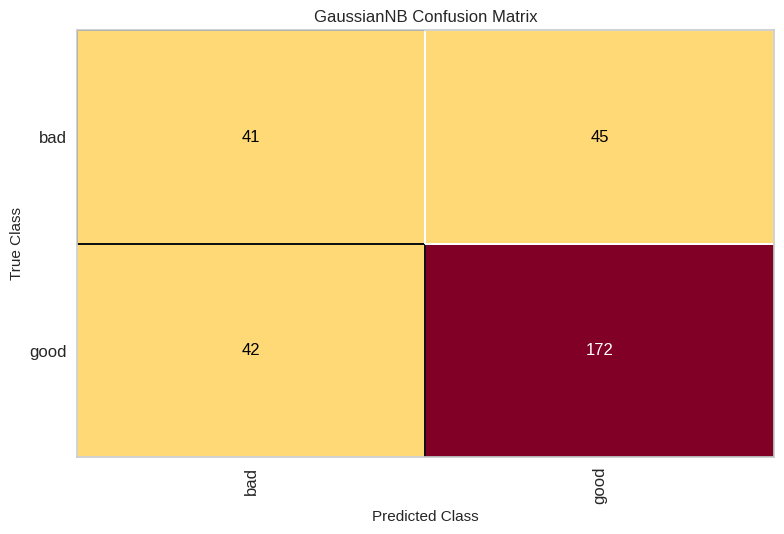

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [65]:
# visualizar a matriz de confusao
v = ConfusionMatrix(GaussianNB())
v.fit(x_treinamento, y_treinamento)
v.score(x_teste, y_teste)
v.poof()

In [66]:
# previsão com novo registro
novo_credito = pd.read_csv('NovoCredit.csv')
novo_credito.shape

(1, 20)

In [67]:
# usando o mesmo objeto que foi criado antes pra manter o padrão dos dados
# chamamos somente o metodo transform, pois a daptacao dos dados fir doi feita anteriormente
novo_credito = novo_credito.iloc[:, 0:20].values
novo_credito[:, 0] = labelencoder1.transform(novo_credito[:, 0])
novo_credito[:, 2] = labelencoder2.transform(novo_credito[:, 2])
novo_credito[:, 3] = labelencoder3.transform(novo_credito[:, 3])
novo_credito[:, 5] = labelencoder5.transform(novo_credito[:, 5])
novo_credito[:, 6] = labelencoder6.transform(novo_credito[:, 6])
novo_credito[:, 8] = labelencoder8.transform(novo_credito[:, 8])
novo_credito[:, 9] = labelencoder9.transform(novo_credito[:, 9])
novo_credito[:, 11] = labelencoder11.transform(novo_credito[:, 11])
novo_credito[:, 13] = labelencoder13.transform(novo_credito[:, 13])
novo_credito[:, 14] = labelencoder14.transform(novo_credito[:, 14])
novo_credito[:, 16] = labelencoder16.transform(novo_credito[:, 16])
novo_credito[:, 18] = labelencoder18.transform(novo_credito[:, 18])
novo_credito[:, 19] = labelencoder19.transform(novo_credito[:, 19])


In [68]:
# resultado da previsão
naive_bayes.predict(novo_credito)

array(['good'], dtype='<U4')